In [1]:
import mlx.core as mx
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

test_set = mx.load('test.npz')
test_set.keys()

dict_keys(['X_test', 'y_test'])

In [2]:
X_test = np.asarray(test_set['X_test'])
y_test = np.asarray(test_set['y_test'])

X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [3]:
y_test = y_test.reshape(-1)
y_test.shape

(10000,)

In [4]:
import mlx.nn as nn

class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, (4, 4)),
            nn.ReLU(),
            nn.Conv2d(32, 32, (4, 4)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)), # 32x32x3 -> 26x26x32 -> 13x13x32
            nn.Conv2d(32, 64, (4, 4)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (4, 4)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)), # 13x13x32 -> 7x7x64 -> 3x3x64
        )
        self.fc = nn.Sequential(
            nn.Linear(3*3*64, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            # nn.Softmax(),
        )
    
    def __call__(self, x) -> mx.array:
        x = self.feature_extractor(x)
        x = mx.flatten(x, start_axis=1)
        x = self.fc(x)
        return x
    
    def predict_class(self, x) -> mx.array:
        x = self(x)
        return mx.argmax(x, axis=-1)

model = CIFAR10Classifier()
model.load_weights('large_cifar_10.npz')
mx.eval(model.parameters())

In [5]:
X_test_mx = test_set['X_test'].astype(mx.float32)
X_test_mx /= 255.0
preds = model.predict_class(X_test_mx)
preds.shape

(10000,)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

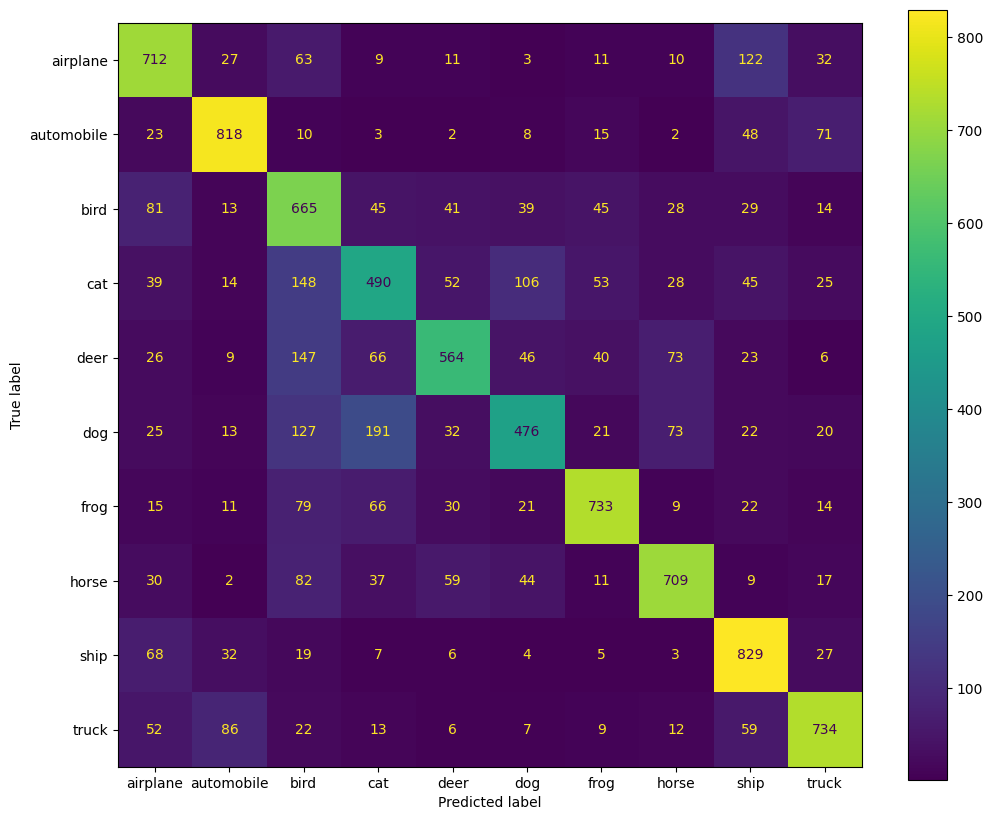

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax)
plt.show()

In [23]:
y_pred = np.asarray(preds).astype(np.uint8)
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.66      0.71      0.69      1000
  automobile       0.80      0.82      0.81      1000
        bird       0.49      0.67      0.56      1000
         cat       0.53      0.49      0.51      1000
        deer       0.70      0.56      0.63      1000
         dog       0.63      0.48      0.54      1000
        frog       0.78      0.73      0.75      1000
       horse       0.75      0.71      0.73      1000
        ship       0.69      0.83      0.75      1000
       truck       0.76      0.73      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

